**CK-MB**
- Uma enzima cardíaca liberada durante dano ao músculo cardíaco

**Troponin**
- Um biomarcador proteico altamente específico para lesão do músculo cardíaco

**Result**
- O rótulo do resultado que indica se o paciente sofreu ou não um ataque cardíaco

In [1]:
# Importar as bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importar as bilbliotecas de classificação para modelos supervisionados:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('/content/Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
# Vendo o formato:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
# Vendo se tem valores nulos e duplicados:
print(df.isnull().sum())
print(df.duplicated().sum())


Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64
0


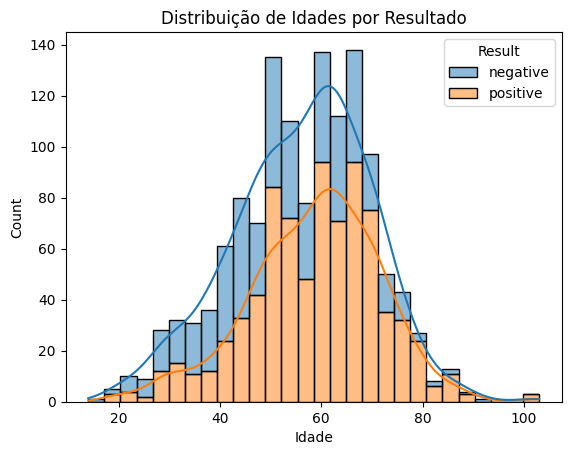

In [5]:
# Criano um histograma de idades:

sns.histplot(data=df, x='Age', hue='Result', kde=True, multiple='stack')
plt.xlabel('Idade')
plt.title('Distribuição de Idades por Resultado')
plt.show()



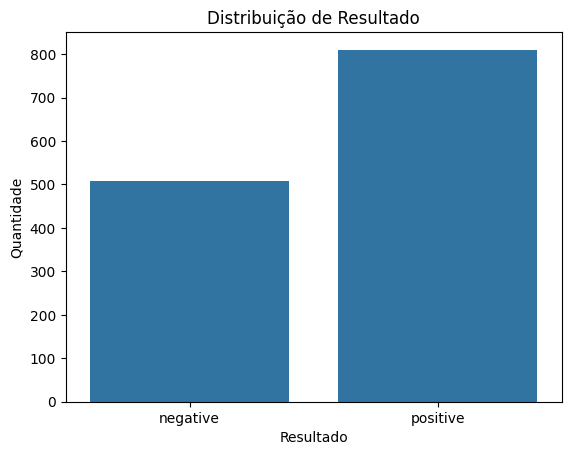

In [6]:
# Obeservando a quantidade de pessoas que tiveram ataques cardíacos:

sns.countplot(data=df, x='Result')
plt.xlabel('Resultado')
plt.ylabel('Quantidade')
plt.title('Distribuição de Resultado')
plt.show()

In [7]:
# Análise descritiva:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


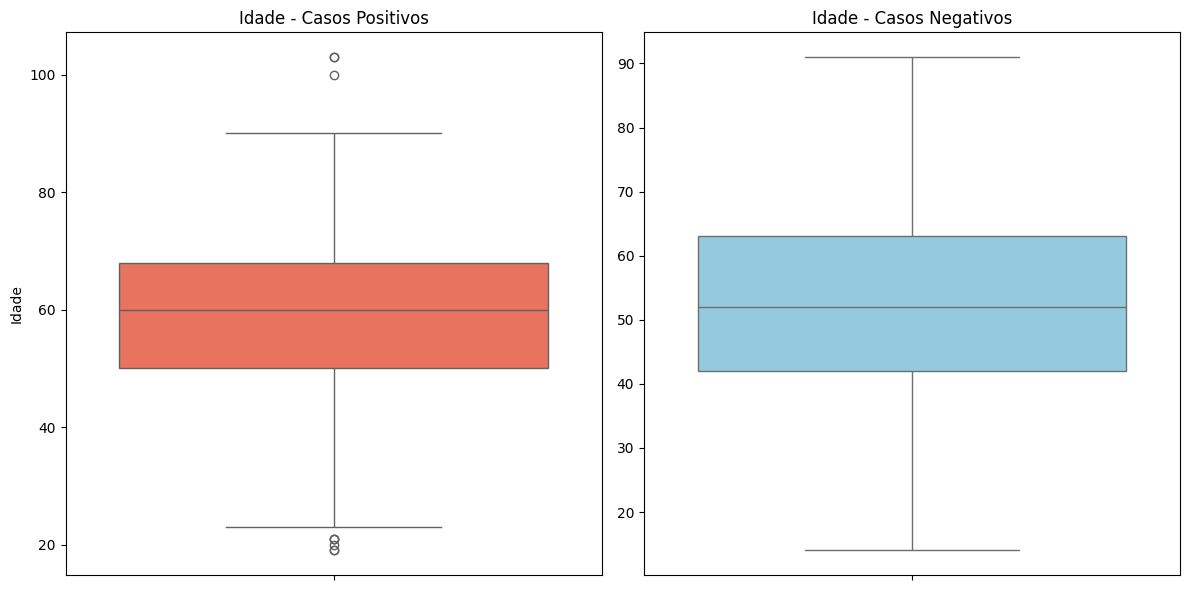

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtros
positivos = df[df['Result'] == 'positive']
negativos = df[df['Result'] == 'negative']

# Criar os dois boxplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para Positivos
sns.boxplot(y=positivos['Age'], ax=axes[0], color='tomato')
axes[0].set_title('Idade - Casos Positivos')
axes[0].set_ylabel('Idade')

# Boxplot para Negativos
sns.boxplot(y=negativos['Age'], ax=axes[1], color='skyblue')
axes[1].set_title('Idade - Casos Negativos')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [9]:
# Filtros
positivos = df[df['Result'] == 'positive']
negativos = df[df['Result'] == 'negative']

# Adiciona uma nova coluna para identificar o grupo
positivos = positivos.copy()
negativos = negativos.copy()
positivos['Grupo'] = 'Positivo'
negativos['Grupo'] = 'Negativo'

# Combina os dois DataFrames
df_comparacao = pd.concat([positivos, negativos])

# Gera o boxplot
fig = px.box(df_comparacao, x='Grupo', y='Age', color='Grupo',
             points='all',  # mostra os pontos individuais
             title='Distribuição da Idade por Grupo (Positivo vs. Negativo)')

fig.update_layout(yaxis_title='Idade', xaxis_title='Grupo')
fig.show()

In [10]:
# Filtar Positivos e Negativos:

positivos = df[df['Result'] == 'positive']
negativos = df[df['Result'] == 'negative']


In [11]:
# Resumo da idade dos Positivos:

print("Estatísticas da idade - positivos:")
print(positivos['Age'].describe())

Estatísticas da idade - positivos:
count    810.000000
mean      58.766667
std       12.955419
min       19.000000
25%       50.000000
50%       60.000000
75%       68.000000
max      103.000000
Name: Age, dtype: float64


In [12]:
# Resumo da idade do Negativos:

print("\nEstatísticas da idade - negativos:")
print(negativos['Age'].describe())


Estatísticas da idade - negativos:
count    509.000000
mean      52.094303
std       13.730783
min       14.000000
25%       42.000000
50%       52.000000
75%       63.000000
max       91.000000
Name: Age, dtype: float64


In [13]:
# Calcular a probabilidade de ataque cardíaco para idade < 23:

total_abaixo_23 = df[df['Age'] < 23].shape[0]
positivos_abaixo_23 = positivos[positivos['Age'] < 23].shape[0]

prob_ataque_abaixo_23 = (positivos_abaixo_23 / total_abaixo_23) * 100 if total_abaixo_23 > 0 else 0

print(f"Total com idade < 23: {total_abaixo_23}")
print(f"Total positivos com idade < 23: {positivos_abaixo_23}")
print(f"Probabilidade de ataque cardíaco com idade < 23: {prob_ataque_abaixo_23:.2f}%")

Total com idade < 23: 14
Total positivos com idade < 23: 6
Probabilidade de ataque cardíaco com idade < 23: 42.86%


In [14]:
# probabilidade geral de ataque cardíaco na população inteira para a faixa < 23 anos, faça:

prob_geral_abaixo_23 = (positivos_abaixo_23 / df.shape[0]) * 100
print(f"Probabilidade geral de ataque cardíaco com idade < 23: {prob_geral_abaixo_23:.2f}%")

Probabilidade geral de ataque cardíaco com idade < 23: 0.45%


Exatamente! Esse valor mostra que, considerando toda a população do seu dataset, a chance de alguém com menos de 23 anos ter tido um ataque cardíaco é baixa (0,45%).

Mas, entre as pessoas jovens (abaixo de 23), quem teve ataque representa uma fatia significativa (42,86%). Ou seja, mesmo sendo raro ocorrer em jovens, se considerarmos só quem é jovem, o risco entre eles que tiveram ataque é relativamente alto.

**O que significa esse 42,86%?**

- Entre todas as pessoas com menos de 23 anos (14 no total), quase metade (6) teve ataque cardíaco.

Ou seja, para esse grupo de jovens, o risco relativo de ataque é alto — mesmo que o número absoluto deles seja pequeno dentro da população total.

**O que significa esse 0,45%?**

- Quando consideramos toda a população (1319 pessoas), a chance de alguém ser jovem e ter ataque é muito pequena (0,45%).

Ou seja, ataques cardíacos são raros em jovens no seu conjunto de dados.

**Conclusão geral:**

- Ataques em jovens são pouco frequentes, mas quando ocorrem, representam uma proporção alta dentro do grupo jovem.

Portanto, embora o grupo de jovens seja pequeno, é importante não descartá-lo como irrelevante, pois o risco dentro dele é significativo.

Isso sugere que, para modelagem ou intervenções, é válido analisar e talvez tratar os jovens como um grupo de risco específico, mesmo que o foco maior seja nos grupos de idade mais avançada.



In [15]:
# Filtrar as pessoas acima de 60 anos:
acima_60 = df[df['Age'] > 60]

In [16]:
# Probabilidade de ter ataque cardíaco para o grupa acima de 60:

acima_60_positivo = acima_60[acima_60['Result'] == 'positive']

prob_acima_60_positivo = (acima_60_positivo.shape[0] / acima_60.shape[0]) * 1
print(f"Probabilidade de ter ataque cardíaco para pessoas acima de 60 anos: {prob_acima_60_positivo:.1%}")



Probabilidade de ter ataque cardíaco para pessoas acima de 60 anos: 71.2%


In [17]:
# 1. Definir as faixas etárias
bins = [0, 40, 50, 60, 70, 80, 90, 120]
labels = ['0-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# 2. Criar uma nova coluna com a faixa etária de cada pessoa
df['Faixa Etária'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# 3. Calcular a proporção de positivos por faixa
proporcao_positivos = df.groupby('Faixa Etária')['Result'].apply(lambda x: (x == 'positive').mean())

# 4. Exibir os resultados
print("Proporção de ataque cardíaco por faixa etária:")
print(proporcao_positivos.apply(lambda x: f"{x:.1%}"))


Proporção de ataque cardíaco por faixa etária:
Faixa Etária
0-40     40.3%
41-50    50.9%
51-60    65.8%
61-70    69.8%
71-80    73.1%
81-90    80.0%
91+      75.0%
Name: Result, dtype: object


<ipython-input-17-b4ae174c8472>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-18-89ef987db347>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



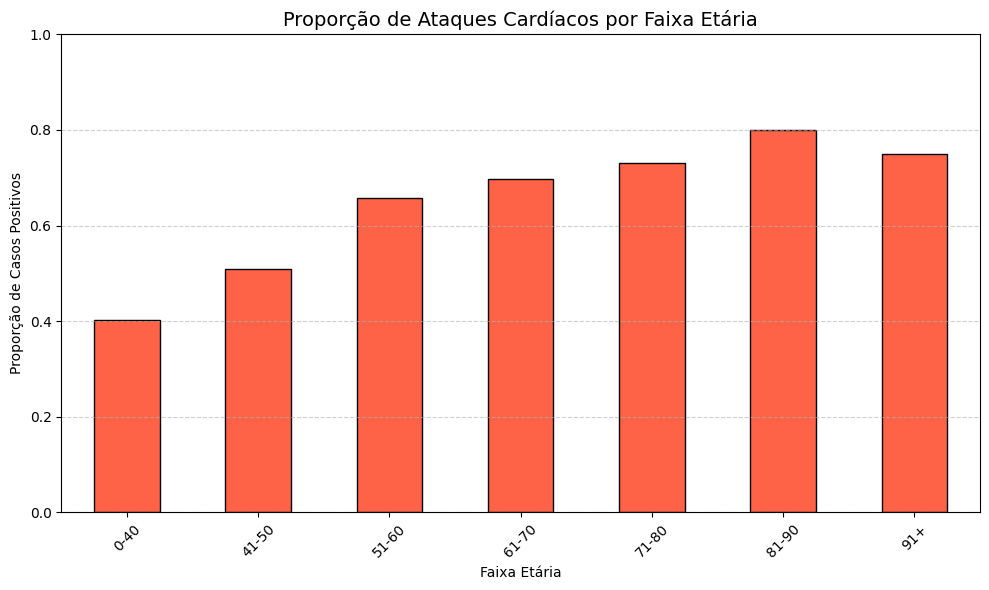

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definir faixas etárias
bins = [0, 40, 50, 60, 70, 80, 90, 120]
labels = ['0-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# 2. Criar coluna com as faixas
df['Faixa Etária'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# 3. Calcular proporção de positivos
proporcao_positivos = df.groupby('Faixa Etária')['Result'].apply(lambda x: (x == 'positive').mean())

# 4. Plotar o gráfico
plt.figure(figsize=(10, 6))
proporcao_positivos.plot(kind='bar', color='tomato', edgecolor='black')

plt.title('Proporção de Ataques Cardíacos por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Casos Positivos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


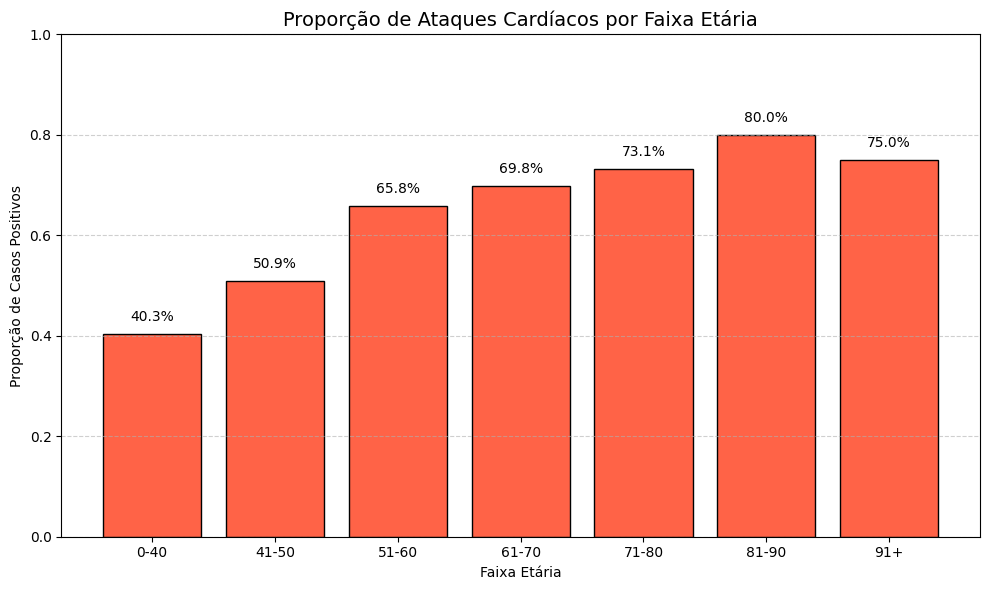

In [19]:
import matplotlib.pyplot as plt

# Plotando gráfico com valores no topo
plt.figure(figsize=(10, 6))
bars = plt.bar(proporcao_positivos.index, proporcao_positivos.values, color='tomato', edgecolor='black')

plt.title('Proporção de Ataques Cardíacos por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Casos Positivos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando os valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.1%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Esses resultados mostram uma tendência clara de aumento na proporção de ataques cardíacos com a idade, especialmente a partir dos 50 anos — o que está de acordo com o que se espera na literatura médica.

- A maior taxa ocorre na faixa 81–90 anos (80%).

- A faixa 0–40 anos, apesar de jovem, tem uma taxa de 40.3%, o que pode indicar:

- Presença de fatores de risco importantes já em pessoas jovens.

- Ou que os pacientes atendidos (ou registrados) com menos de 40 anos já são de alto risco.

In [20]:
#Etapa 1: Filtrar os dados dos jovens (idade < 23)

jovens = df[df['Age'] < 23]


In [21]:
#Etapa 2: Separar positivos e negativos:

jovens_pos = jovens[jovens['Result'] == 'positive']
jovens_neg = jovens[jovens['Result'] == 'negative']


In [22]:
#Etapa 3: Comparar as médias dos fatores clínicos
# Isso nos ajudará a entender o que diferencia os jovens que tiveram ataque cardíaco dos que não tiveram.

variaveis_clinicas = ['Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                      'Blood sugar', 'CK-MB', 'Troponin']

media_pos = jovens_pos[variaveis_clinicas].mean()
media_neg = jovens_neg[variaveis_clinicas].mean()

comparacao = pd.DataFrame({
    'Média (Positivo)': media_pos,
    'Média (Negativo)': media_neg,
    'Diferença Absoluta': (media_pos - media_neg).abs()
}).sort_values(by='Diferença Absoluta', ascending=False)

print(comparacao)


                          Média (Positivo)  Média (Negativo)  \
CK-MB                            61.476667            2.7220   
Blood sugar                     180.833333          137.8750   
Systolic blood pressure         128.833333          134.0000   
Heart rate                       78.000000           73.1250   
Diastolic blood pressure         71.166667           73.1250   
Troponin                          0.589000            0.0055   

                          Diferença Absoluta  
CK-MB                              58.754667  
Blood sugar                        42.958333  
Systolic blood pressure             5.166667  
Heart rate                          4.875000  
Diastolic blood pressure            1.958333  
Troponin                            0.583500  


🎯 Principais fatores de risco nos jovens:
CK-MB altíssimo: biomarcador que indica lesão no músculo cardíaco. Pode ser decisivo no diagnóstico precoce.

1) Troponina elevada: outro marcador chave para infarto, reforçando o risco cardíaco mesmo em jovens.

2) Glicemia elevada: pode apontar para diabetes tipo 1 ou 2 precoce, obesidade, ou maus hábitos alimentares.

3) Frequência cardíaca levemente maior: não é fator principal, mas pode somar com os outros.

📌 Conclusão parcial:
Mesmo entre jovens, os biomarcadores cardíacos (CK-MB e Troponin) e o açúcar no sangue (Blood sugar) são os principais alertas de risco de ataque cardíaco.

In [23]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Faixa Etária
0,64,1,66,160,83,160.0,1.80,0.012,negative,61-70
1,21,1,94,98,46,296.0,6.75,1.060,positive,0-40
2,55,1,64,160,77,270.0,1.99,0.003,negative,51-60
3,64,1,70,120,55,270.0,13.87,0.122,positive,61-70
4,55,1,64,112,65,300.0,1.08,0.003,negative,51-60


In [25]:
colunas_numericas = ['Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                     'Blood sugar', 'CK-MB', 'Troponin']

def comparar_por_idade(df, faixa):
    if faixa == '50+':
        df_faixa = df[df['Age'] >= 50]
    else:
        df_faixa = df[df['Age'] < 50]

    media_positive = df_faixa[df_faixa['Result'] == 'positive'][colunas_numericas].mean()
    media_negative = df_faixa[df_faixa['Result'] == 'negative'][colunas_numericas].mean()
    diferenca = (media_positive - media_negative).abs()

    comparativo = pd.DataFrame({
        'Média (Positivo)': media_positive,
        'Média (Negativo)': media_negative,
        'Diferença Absoluta': diferenca
    })

    return comparativo

comparacao_50mais = comparar_por_idade(df, '50+')
comparacao_50menos = comparar_por_idade(df, '50-')

In [26]:
comparacao_50mais

,Média (Positivo),Média (Negativo),Diferença Absoluta
Heart rate,77.474178,75.946128,1.528050
Systolic blood pressure,127.107981,128.437710,1.329729
Diastolic blood pressure,72.370892,72.457912,0.087020
Blood sugar,145.266041,154.894613,9.628572
CK-MB,21.317293,2.485178,18.832114
Troponin,0.609565,0.042633,0.566932


In [28]:
comparacao_50menos

,Média (Positivo),Média (Negativo),Diferença Absoluta
Heart rate,82.900585,80.603774,2.296811
Systolic blood pressure,125.362573,127.042453,1.679880
Diastolic blood pressure,71.380117,72.415094,1.034977
Blood sugar,142.450292,142.561321,0.111028
CK-MB,30.551982,2.653642,27.898341
Troponin,0.425930,0.005071,0.420859


🔎 Análise Comparativa (50+ vs 50-)
1. CK-MB
50+: diferença = 18.83

50-: diferença = 27.90

Conclusão: o CK-MB tem grande diferença em ambos os grupos, especialmente em 50-, indicando alta associação com risco mesmo em pessoas mais jovens.

2. Troponina
50+: diferença = 0.57

50-: diferença = 0.42

Conclusão: troponina também tem impacto elevado nos dois grupos, um pouco mais em 50+.

3. Glicemia (Blood sugar)
50+: positiva < negativa (!)

50-: quase igual

Conclusão: glicemia não parece um bom discriminador nesses grupos. Em 50+, ela está até maior nos casos negativos.

4. Pressão sistólica
50+: leve diferença (~1.3)

50-: leve diferença (~1.7)

Conclusão: pequena influência, talvez não relevante isoladamente.

5. Frequência cardíaca
50+: diferença = 1.5

50-: diferença = 2.3

Conclusão: mais sensível em jovens, mas ainda diferença pequena.

6. Pressão diastólica
Diferenças desprezíveis (<1.1)

✅ Principais insights
CK-MB e Troponina são os dois marcadores com maior poder discriminativo para ambos os grupos.

Blood sugar não apresenta padrão claro — até confunde nos 50+.

Jovens (50-) têm diferenças maiores em CK-MB e frequência cardíaca do que os 50+.

Pressão arterial tem impacto pequeno.



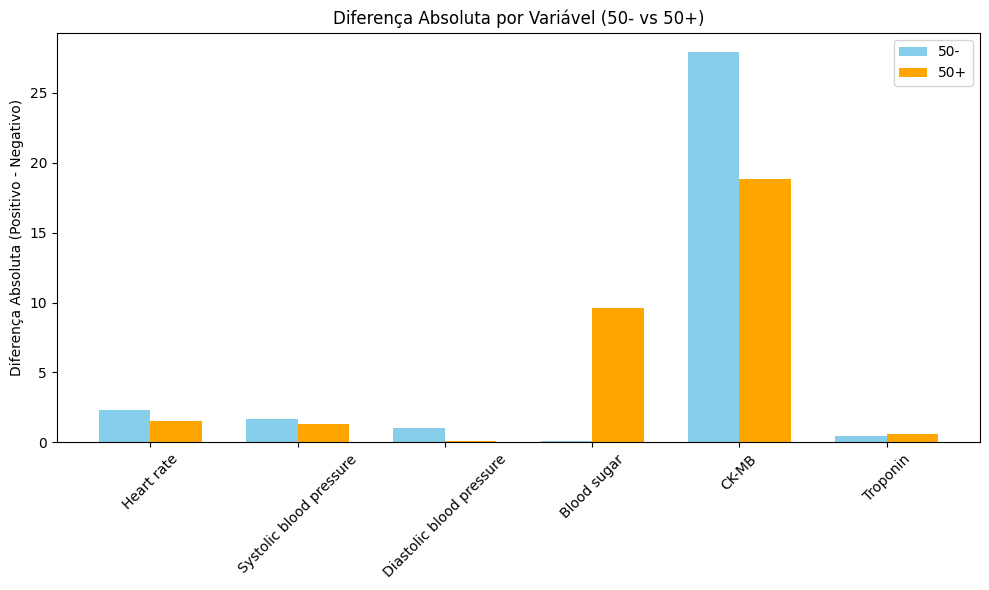

In [29]:
# 1. Gráfico de Barras – Diferença Absoluta (50- vs 50+):

# Dados
variaveis = comparacao_50mais.index
diferencas_50mais = comparacao_50mais['Diferença Absoluta']
diferencas_50menos = comparacao_50menos['Diferença Absoluta']

# Gráfico
x = range(len(variaveis))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, diferencas_50menos, width=width, label='50-', color='skyblue')
plt.bar([i + width for i in x], diferencas_50mais, width=width, label='50+', color='orange')
plt.xticks([i + width/2 for i in x], variaveis, rotation=45)
plt.ylabel('Diferença Absoluta (Positivo - Negativo)')
plt.title('Diferença Absoluta por Variável (50- vs 50+)')
plt.legend()
plt.tight_layout()
plt.show()

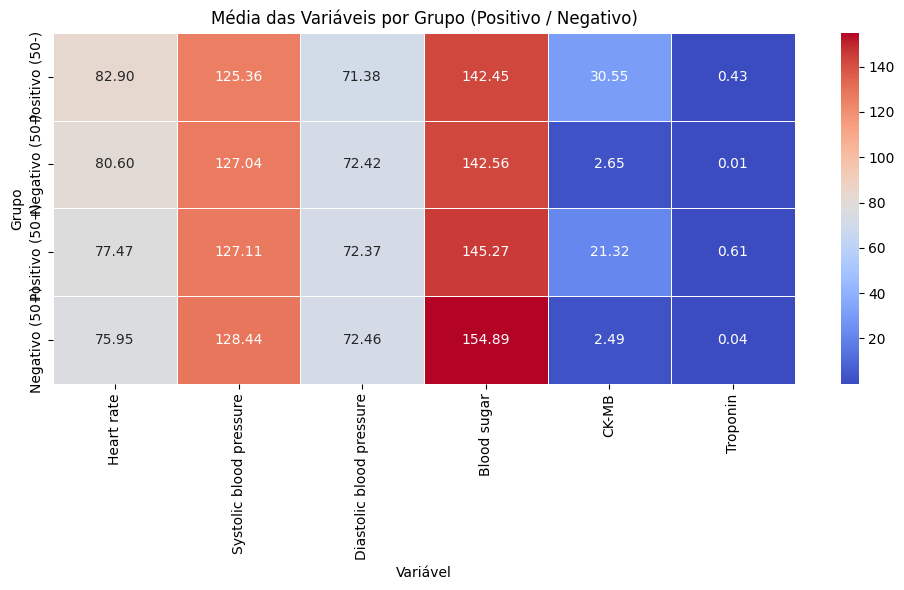

In [30]:
#  Heatmap – Médias por Grupo:

# Preparar os dados
heatmap_data = pd.concat([
    comparacao_50menos[['Média (Positivo)', 'Média (Negativo)']].rename(columns={
        'Média (Positivo)': 'Positivo (50-)',
        'Média (Negativo)': 'Negativo (50-)'
    }),
    comparacao_50mais[['Média (Positivo)', 'Média (Negativo)']].rename(columns={
        'Média (Positivo)': 'Positivo (50+)',
        'Média (Negativo)': 'Negativo (50+)'
    })
], axis=1)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Média das Variáveis por Grupo (Positivo / Negativo)')
plt.ylabel('Grupo')
plt.xlabel('Variável')
plt.tight_layout()
plt.show()


📊 Conclusões com base no gráfico de barras
1. CK-MB: Impacto mais alto em pessoas com menos de 50 anos
A diferença entre positivos e negativos foi maior em 50- (27.9) do que em 50+ (18.8).

Conclusão: o aumento da enzima CK-MB é um sinal ainda mais forte de ataque cardíaco em pessoas mais jovens.

Em outras palavras, quando uma pessoa jovem apresenta CK-MB alto, é um sinal de alerta ainda mais significativo do que em idosos, onde a elevação pode ocorrer por outras razões também (ex: comorbidades, degenerações cardíacas progressivas, etc.).

2. Troponina: alta relevância em ambos os grupos
Diferença de ~0.42 em 50- e ~0.57 em 50+.

Apesar da escala ser menor, a troponina continua sendo um marcador altamente confiável de dano cardíaco, independente da idade.

3. Blood Sugar (Glicemia): comportamento estranho
Diferença quase nula em 50-.

Em 50+, a média foi maior nos negativos, o que é contraintuitivo.

Conclusão: neste dataset, a glicemia não está claramente associada a ataques cardíacos, e talvez indique outros tipos de doenças em idosos (como diabetes sem eventos cardíacos).

4. Pressão arterial e frequência cardíaca: impacto pequeno
Diferenças muito pequenas, o que sugere que isoladamente esses sinais vitais não são bons preditores.

A diferença levemente maior em frequência cardíaca para 50- indica que jovens com frequência mais elevada têm maior chance de resultado positivo — mas o impacto é modesto.

🧓📈 Como a idade se relaciona com ataques cardíacos nesse dataset?
Com base na sua contagem por faixa etária:

Faixa Etária	Positivos	Negativos
0–40	71	105
41–50	140	135
51–60	233	121
61–70	245	106
71–80	98	36
81–90	20	5
91+	3	1

🔍 Conclusões:
A proporção de positivos aumenta com a idade, especialmente a partir dos 50 anos.

Por exemplo:

Em 0–40, só ~40% são positivos.

Em 51–60, já são quase 2x mais positivos que negativos.

Em 61–70, segue a mesma tendência.

Conclusão geral: a idade é fortemente associada a maior risco de ataque cardíaco.

✅ Resumo das conclusões:
Fator	Conclusão
CK-MB	Mais discriminativo em jovens (<50). Forte sinal de risco.
Troponina	Indicador confiável em todas as idades.
Glicemia	Não útil para prever ataques cardíacos neste dataset.
Frequência cardíaca / Pressão	Impacto pequeno e limitado.
Idade	Risco aumenta significativamente com a idade.



In [31]:
df['Result'].value_counts()

,count
Result,
positive,810
negative,509


In [32]:
pd.crosstab(df['Gender'], df['Result'])


Result,negative,positive
Gender,,
0,202,247
1,307,563


In [33]:
pd.crosstab(df['Gender'], df['Result'], normalize='index').mul(100).round(2)

Result,negative,positive
Gender,,
0,44.99,55.01
1,35.29,64.71


In [34]:
# Teste estatístico:

import pandas as pd
from scipy.stats import chi2_contingency

# Sua tabela de contingência
contingency_table = pd.crosstab(df['Gender'], df['Result'])

# Aplicar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grau de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

# Interpretação
if p < 0.05:
    print("Rejeitamos a hipótese nula: existe associação significativa entre gênero e resultado.")
else:
    print("Não rejeitamos a hipótese nula: não há associação significativa entre gênero e resultado.")


Qui-quadrado: 11.3563
p-valor: 0.0008
Grau de liberdade: 1
Frequências esperadas:
[[173.26838514 275.73161486]
 [335.73161486 534.26838514]]
Rejeitamos a hipótese nula: existe associação significativa entre gênero e resultado.


In [35]:
# Crosstab com Gênero, Faixa Etária e Resultado
ct = pd.crosstab([df['Faixa Etária'], df['Gender']], df['Result'])

# Calcular proporção positiva dentro de cada grupo (faixa etária + gênero)
ct_prop = ct.div(ct.sum(axis=1), axis=0).mul(100).round(2)

print(ct)
print(ct_prop)


Result               negative  positive
Faixa Etária Gender                    
0-40         0             39        16
             1             66        55
41-50        0             45        36
             1             90       104
51-60        0             48        73
             1             73       160
61-70        0             44        66
             1             62       179
71-80        0             24        45
             1             12        53
81-90        0              2         9
             1              3        11
91+          0              0         2
             1              1         1
Result               negative  positive
Faixa Etária Gender                    
0-40         0          70.91     29.09
             1          54.55     45.45
41-50        0          55.56     44.44
             1          46.39     53.61
51-60        0          39.67     60.33
             1          31.33     68.67
61-70        0          40.00     60.00


Interpretação:
Faixa Etária	Gênero	% Positivos	Comentário
0-40	Feminino (0)	29.09%	Baixa proporção de ataque cardíaco.
0-40	Masculino (1)	45.45%	Proporção bem maior que nas mulheres jovens.
41-50	Feminino	44.44%	Aumenta em relação à faixa anterior.
41-50	Masculino	53.61%	Maior proporção nos homens.
51-60	Feminino	60.33%	Passa a ser a maioria.
51-60	Masculino	68.67%	Homem mais afetado, diferença maior.
61-70	Feminino	60.00%	Mantém tendência.
61-70	Masculino	74.27%	Maior risco para homens.
71-80	Feminino	65.22%	Aumenta ainda mais para as mulheres.
71-80	Masculino	81.54%	Muito alto para homens.
81-90	Feminino	81.82%	Alta taxa também para mulheres.
81-90	Masculino	78.57%	Homens continuam com alta taxa.
91+	Feminino	100.00%	N (total muito pequeno, mas todos positivos).
91+	Masculino	50.00%	Amostra pequena, difícil interpretar.

O que isso mostra?
A proporção de ataques cardíacos aumenta com a idade para ambos os gêneros.

Homens apresentam porcentagens consistentemente maiores de resultado positivo em todas as faixas etárias, especialmente notável nas faixas intermediárias (51-80).

A diferença entre gêneros é mais pronunciada nas faixas etárias médias.

Nas faixas muito altas (81+), as taxas de ataque cardíaco são altas para ambos, e a diferença entre gêneros diminui, possivelmente porque outros fatores entram em jogo.



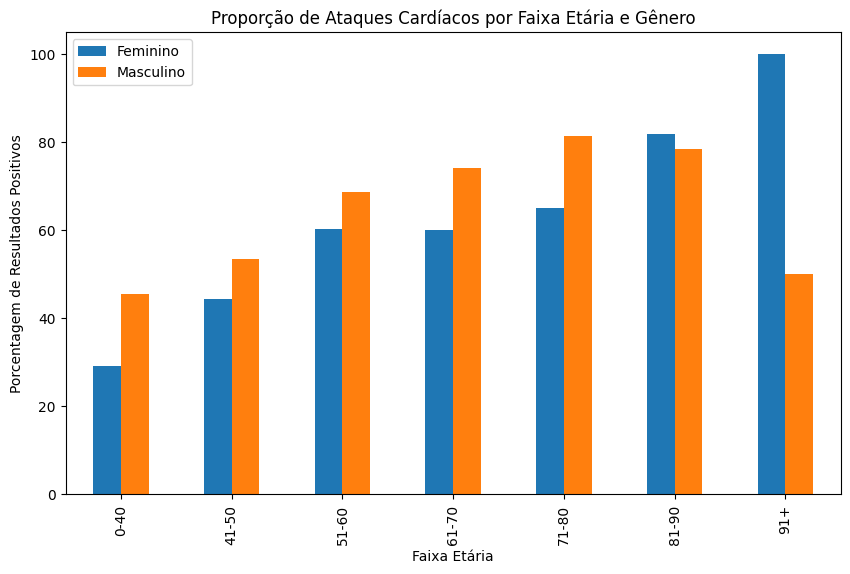

In [36]:
import matplotlib.pyplot as plt

# Reorganizar dados para plotagem
ct_prop_reset = ct_prop.reset_index()

# Filtrar só a coluna positiva e renomear gêneros para facilitar leitura
df_plot = ct_prop_reset.pivot(index='Faixa Etária', columns='Gender', values='positive')
df_plot.columns = ['Feminino', 'Masculino']

# Plot
df_plot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Porcentagem de Resultados Positivos')
plt.title('Proporção de Ataques Cardíacos por Faixa Etária e Gênero')
plt.show()


In [37]:
import numpy as np

df['Resultado'] = np.where(df['Result'] == 'positive', 1, 0)

In [38]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Faixa Etária,Resultado
0,64,1,66,160,83,160.0,1.80,0.012,negative,61-70,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0-40,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,51-60,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,61-70,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,51-60,0


In [39]:
df_geral = df.drop(columns=['Result', 'Faixa Etária'])

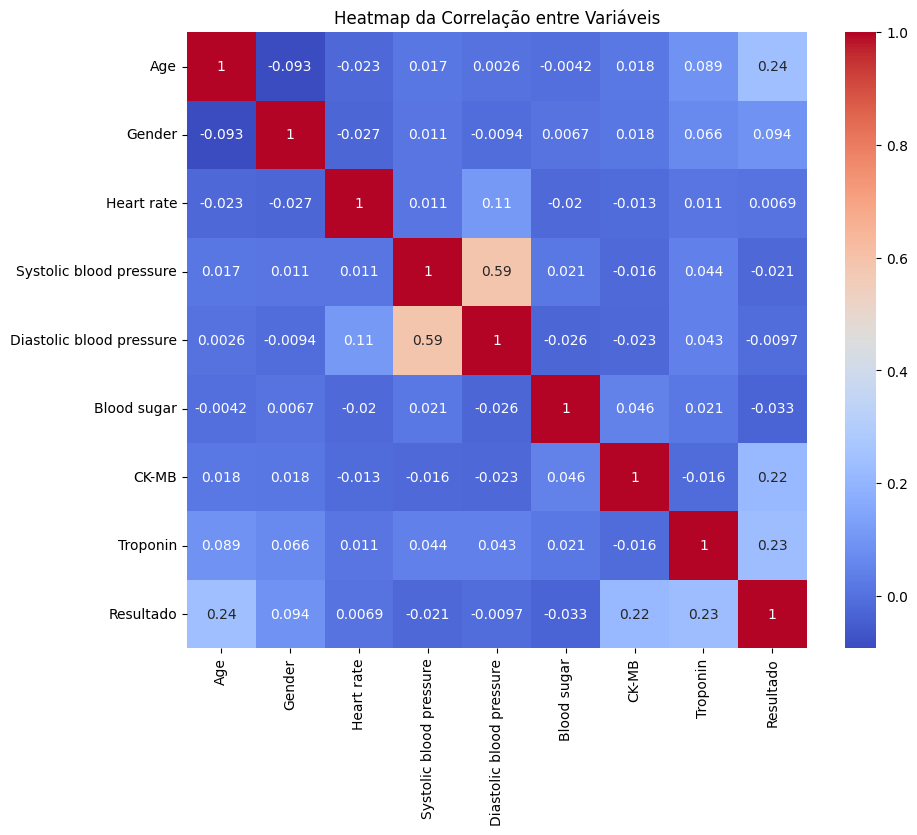

In [40]:
# Correlação para os grupos positivos e negativos:

corr = df_geral.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap da Correlação entre Variáveis')
plt.show()

In [41]:
corr

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Resultado
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Resultado,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


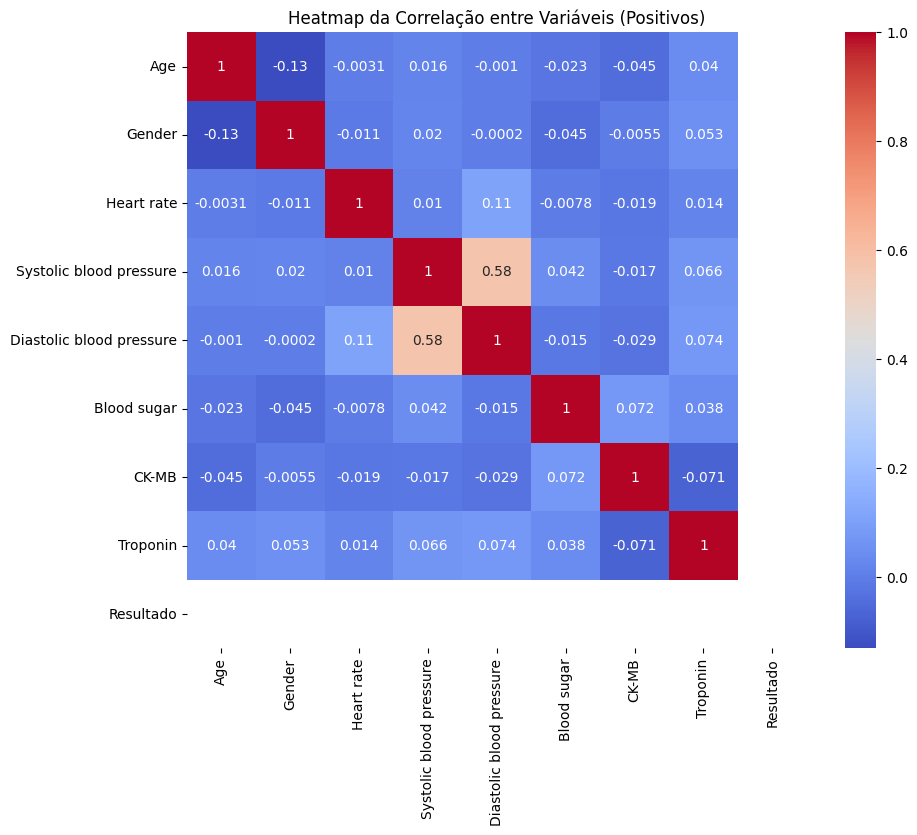

In [42]:
#  Correlação para os grupos positivos:

df_positivos = df[df['Result'] == 'positive']

df_positivos = df_positivos.drop(columns=['Result', 'Faixa Etária'])

corr2 = df_positivos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title('Heatmap da Correlação entre Variáveis (Positivos)')
plt.show()



In [43]:
corr2

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Resultado
Age,1.000000,-0.131650,-0.003106,0.015899,-0.001001,-0.022895,-0.045273,0.040255,NaN
Gender,-0.131650,1.000000,-0.010740,0.019717,-0.000204,-0.044560,-0.005542,0.053430,NaN
Heart rate,-0.003106,-0.010740,1.000000,0.010106,0.107412,-0.007793,-0.018505,0.014467,NaN
Systolic blood pressure,0.015899,0.019717,0.010106,1.000000,0.576026,0.042292,-0.016628,0.065910,NaN
Diastolic blood pressure,-0.001001,-0.000204,0.107412,0.576026,1.000000,-0.015297,-0.029014,0.073784,NaN
Blood sugar,-0.022895,-0.044560,-0.007793,0.042292,-0.015297,1.000000,0.072168,0.038232,NaN
CK-MB,-0.045273,-0.005542,-0.018505,-0.016628,-0.029014,0.072168,1.000000,-0.071284,NaN
Troponin,0.040255,0.053430,0.014467,0.065910,0.073784,0.038232,-0.071284,1.000000,NaN
Resultado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


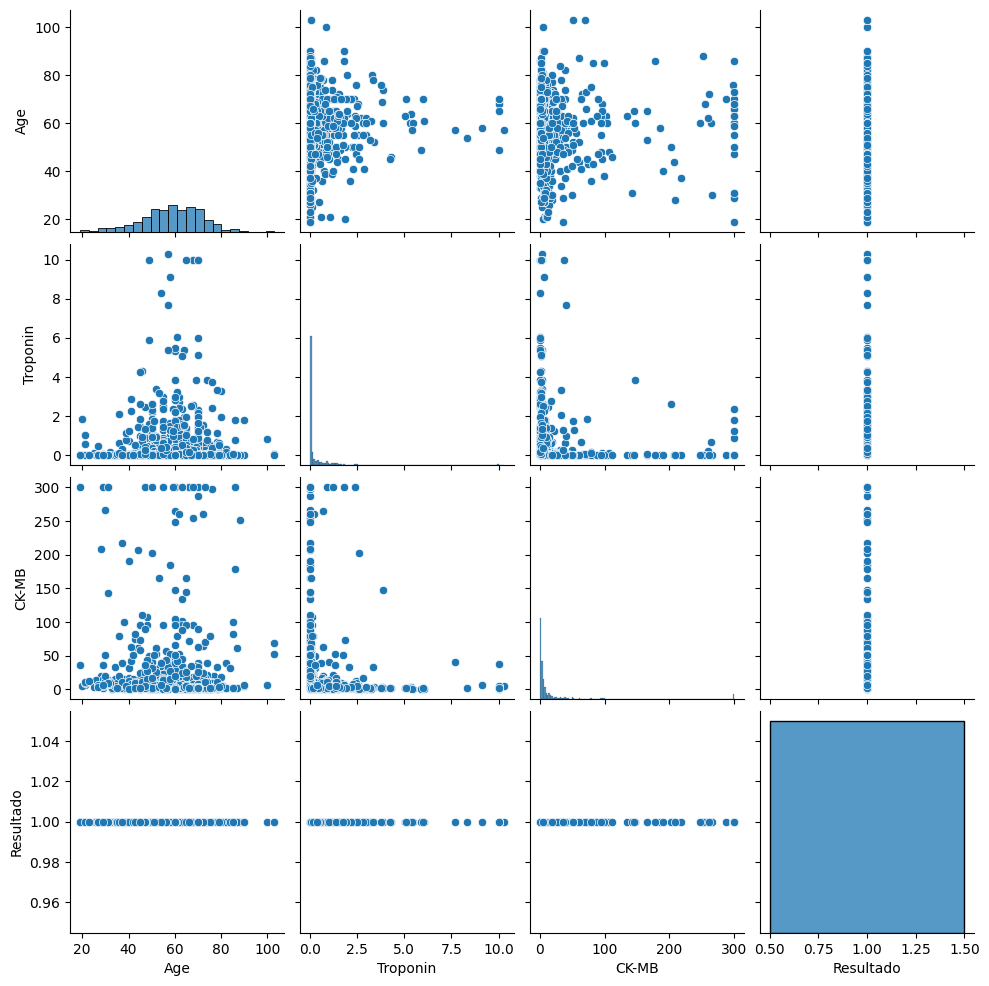

In [44]:
sns.pairplot(df_positivos[['Age', 'Troponin', 'CK-MB', 'Resultado']])

## Treinando os Modelos:

In [45]:
Q1 = df['Troponin'].quantile(0.25)
Q3 = df['Troponin'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df_filtrado = df[(df['Troponin'] >= lim_inf) & (df['Troponin'] <= lim_sup)]
df_filtrado

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Faixa Etária,Resultado
0,64,1,66,160,83,160.0,1.80,0.012,negative,61-70,0
2,55,1,64,160,77,270.0,1.99,0.003,negative,51-60,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,61-70,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,51-60,0
5,58,0,61,112,58,87.0,1.83,0.004,negative,51-60,0
...,...,...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,positive,81-90,1
1312,48,1,84,118,68,96.0,5.33,0.006,negative,41-50,0
1313,86,0,40,179,68,147.0,5.22,0.011,negative,81-90,0
1314,44,1,94,122,67,204.0,1.63,0.006,negative,41-50,0


In [46]:
from scipy.stats import zscore
z_scores = zscore(df[['Troponin', 'CK-MB', 'Heart rate']])
df_sem_outliers = df[(abs(z_scores) < 3).all(axis=1)]

print(z_scores)
print(df_sem_outliers)


[[-3.02342376e-01 -2.90961900e-01 -2.39032215e-01]
 [ 6.05700979e-01 -1.84072428e-01  3.03491001e-01]
 [-3.10140458e-01 -2.86859072e-01 -2.77783874e-01]
 ...
 [ 3.36968791e+00 -3.03054447e-01  1.29108539e-01]
 [-1.68298262e-03 -2.04586569e-01 -3.94038849e-01]
 [ 1.22088302e+00  7.69079350e-01  3.03491001e-01]]
      Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1313   86       0          40                      179   
1314   44       1          94                      122   
1315   66       1          84                      125   
1317   54       1          58                      117   
1318   51       1          94                     

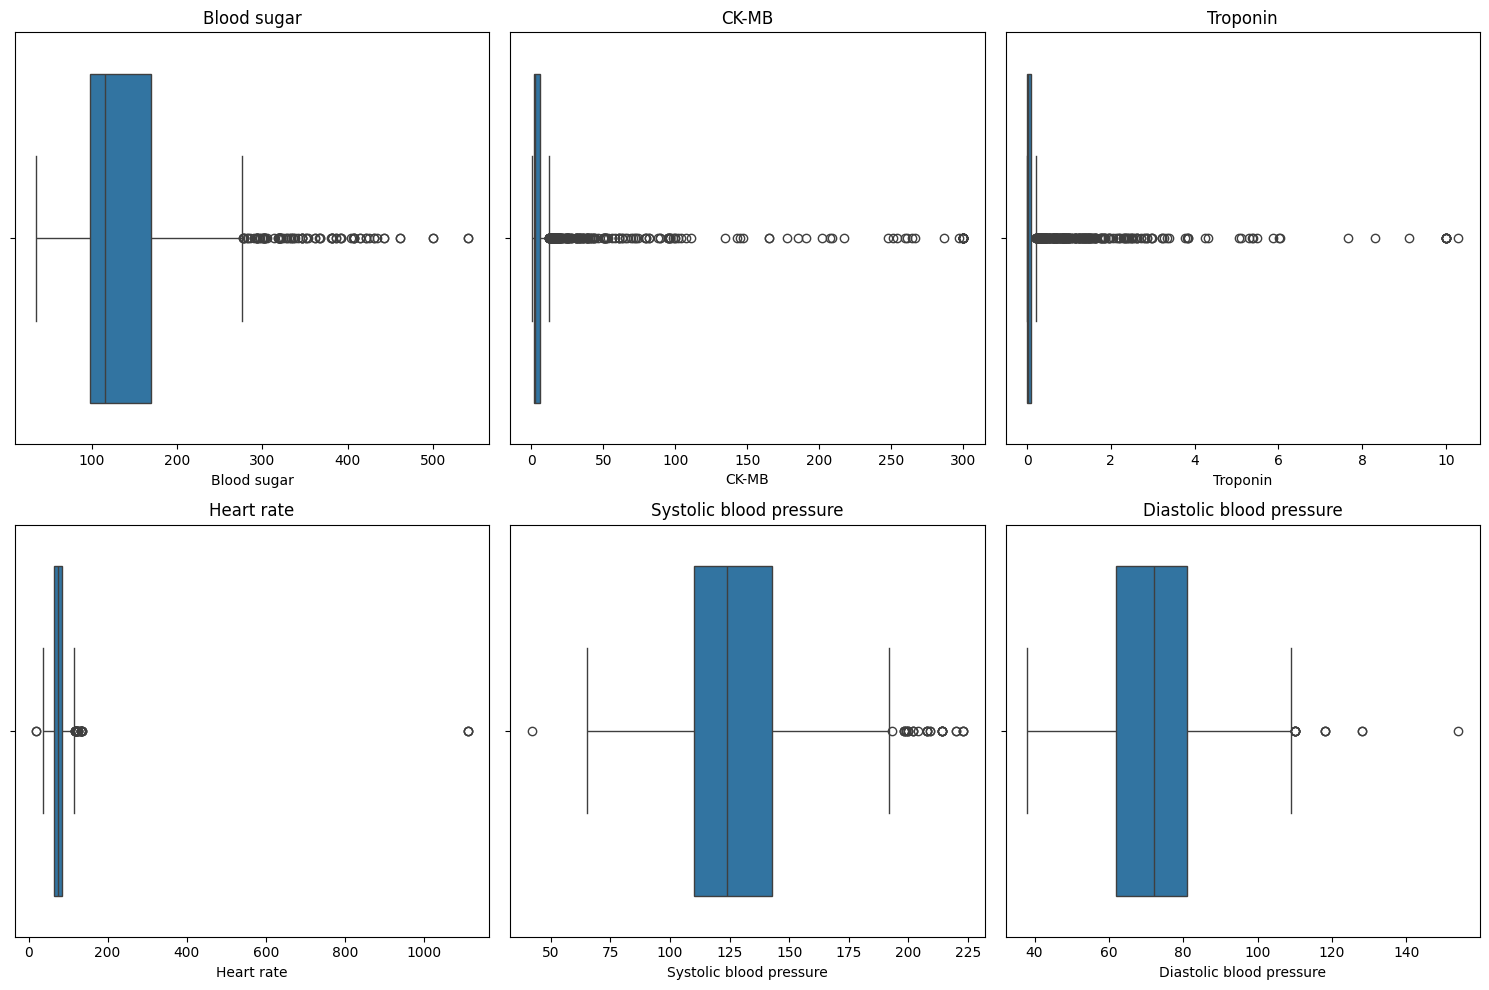

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das variáveis numéricas contínuas
cols = ['Blood sugar', 'CK-MB', 'Troponin', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure']

# Criar boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [48]:
def remover_outliers_iqr(df, colunas):
    df_limpo = df.copy()
    for col in colunas:
        Q1 = df_limpo[col].quantile(0.25)
        Q3 = df_limpo[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_limpo = df_limpo[(df_limpo[col] >= limite_inferior) & (df_limpo[col] <= limite_superior)]
    return df_limpo


In [49]:
# Escolher as colunas numéricas críticas:

colunas_com_outliers = [
    'Blood sugar',
    'CK-MB',
    'Troponin',
    'Heart rate',
    'Systolic blood pressure',
    'Diastolic blood pressure'
]


In [50]:
# 3. Aplicar a função:

df_limpo = remover_outliers_iqr(df, colunas_com_outliers)


In [51]:
 # 4. Comparar desempenho do modelo antes e depois:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Função auxiliar para treino e avaliação
def avaliar_modelo(df, nome='Modelo'):
    X = df.drop(columns=['Result', 'Faixa Etária', 'Resultado'])
    y = df['Resultado']

    # Separar treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinar modelo
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_train, y_train)

    # Prever e avaliar
    y_pred = modelo.predict(X_test)
    print(f"\nDesempenho do {nome}:")
    print(classification_report(y_test, y_pred))

# Avaliar antes
avaliar_modelo(df, 'original')

# Avaliar depois
avaliar_modelo(df_limpo, 'com outliers removidos')



Desempenho do original:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       101
           1       0.82      0.86      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.79      0.80      0.79       264


Desempenho do com outliers removidos:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        89
           1       0.67      0.61      0.64        71

    accuracy                           0.69       160
   macro avg       0.69      0.68      0.69       160
weighted avg       0.69      0.69      0.69       160



In [52]:
# Dividindo os dados:
X = df.drop(columns=['Result', 'Faixa Etária', 'Resultado'])
y = df['Resultado']


In [53]:
# Dividindo os dados em treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
# treinando o Modelolo de Regressão:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# Testando o Modelo:

log_result = log_model.predict(X_test)

In [56]:
# Avaliando o modelo:

print(classification_report(y_test, log_result))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       153
           1       0.83      0.80      0.81       243

    accuracy                           0.78       396
   macro avg       0.76      0.77      0.76       396
weighted avg       0.78      0.78      0.78       396



In [57]:
# Aplicando Regressão Logística com os dados normalizados:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Repetir o split e modelo com os dados normalizados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
log_model.fit(X_train, y_train)
log_result = log_model.predict(X_test)
print(classification_report(y_test, log_result))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71       153
           1       0.82      0.82      0.82       243

    accuracy                           0.78       396
   macro avg       0.76      0.76      0.76       396
weighted avg       0.77      0.78      0.78       396



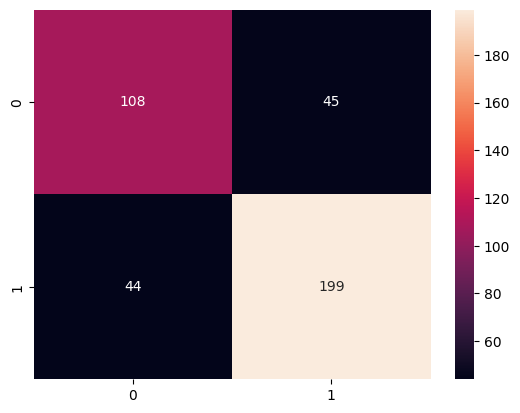

In [58]:
# Criando uma matrix de confusão:

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, log_result)

sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

## Árvore de Decisão:

In [60]:
# Instanciando o Modelo:

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Testando o Modelo:

tree_result = tree_model.predict(X_test)

In [62]:
# Avalinado o modelo:

print(classification_report(y_test, tree_result))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       153
           1       0.98      0.98      0.98       243

    accuracy                           0.97       396
   macro avg       0.97      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396



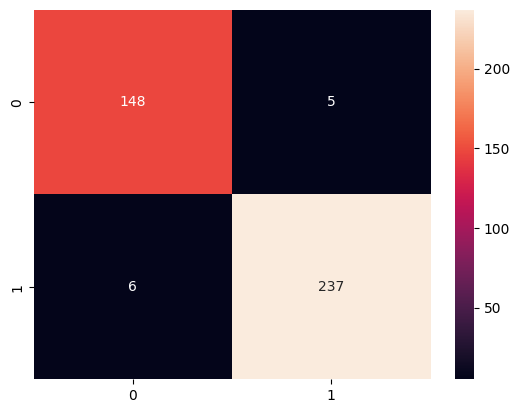

In [63]:
# Matrix de Confusão:

matrix = confusion_matrix(y_test, tree_result)

sns.heatmap(matrix, annot=True, fmt='d')
plt.show()


## Random Forest:

In [64]:
# Instanciando e Treinando o Modelo:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
# Testando o Modelo:

rf_result = rf_model.predict(X_test)

In [66]:
# Avaliando o Modelo:

print(classification_report(y_test, rf_result))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       153
           1       0.99      0.98      0.98       243

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



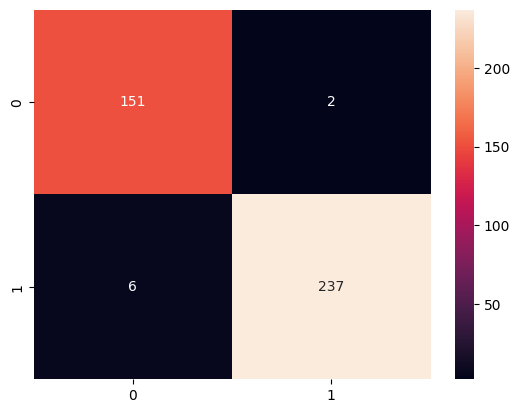

In [67]:
# Matrix de Confusão:

matrix = confusion_matrix(y_test, rf_result)

sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

## XGBoost:



In [68]:
# Instanciando e treinando o Modelo:

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# Testando o Modelo:

xgb_result = xgb_model.predict(X_test)

In [70]:
# Avaliando o Modelo:

print(classification_report(y_test, xgb_result))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.98      0.99       243

    accuracy                           0.98       396
   macro avg       0.98      0.99      0.98       396
weighted avg       0.98      0.98      0.98       396



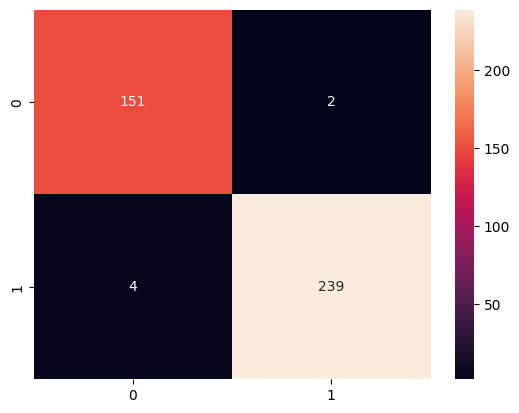

In [71]:
# Matrix de confusão:

matrix = confusion_matrix(y_test, xgb_result)

sns.heatmap(matrix, annot=True, fmt='d')
plt.show()

AUC: 0.9870


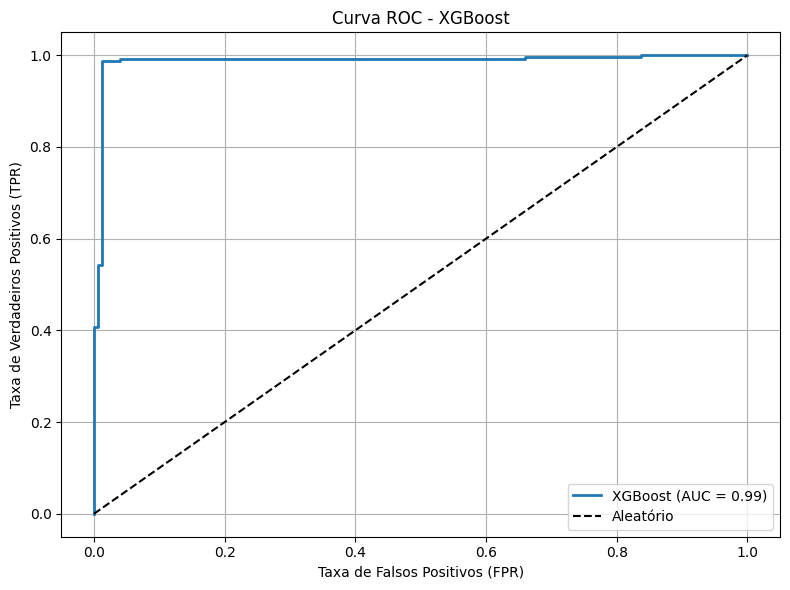

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Obter as probabilidades da classe positiva
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# 2. Calcular FPR, TPR e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 3. Calcular AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

# 4. Plotar a curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


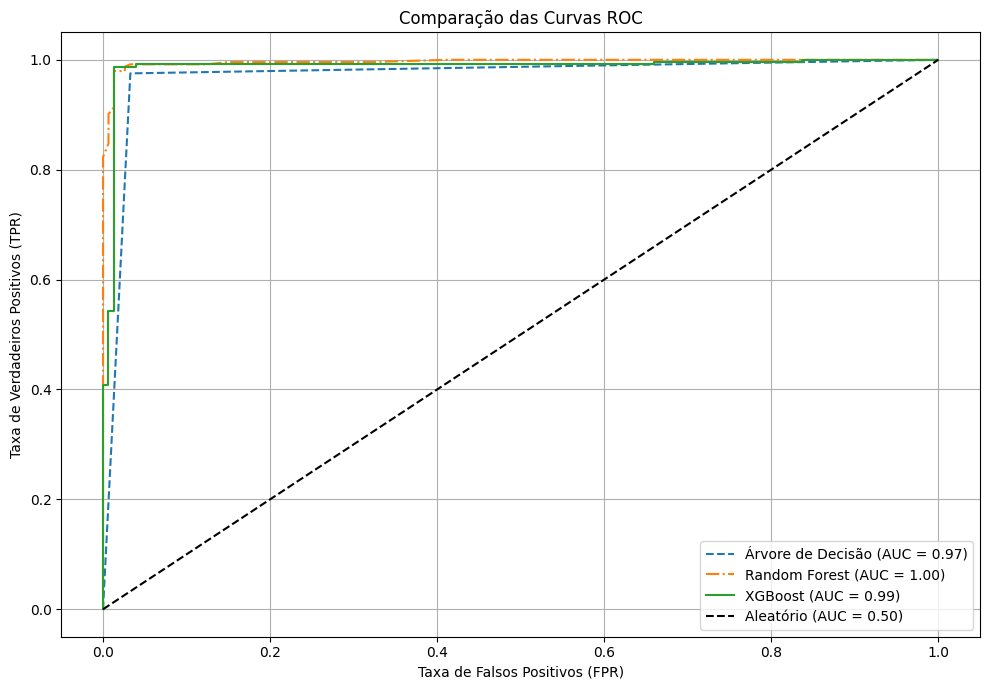

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Obter probabilidades da classe positiva (índice 1) para cada modelo
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
y_proba_rf   = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb  = xgb_model.predict_proba(X_test)[:, 1]

# 2. Calcular curvas ROC e AUCs
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
fpr_rf, tpr_rf, _     = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _   = roc_curve(y_test, y_proba_xgb)

auc_tree = roc_auc_score(y_test, y_proba_tree)
auc_rf   = roc_auc_score(y_test, y_proba_rf)
auc_xgb  = roc_auc_score(y_test, y_proba_xgb)

# 3. Plotar as curvas ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_tree, tpr_tree, label=f'Árvore de Decisão (AUC = {auc_tree:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-.')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linestyle='-')

# Linha de referência (modelo aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')

# Configurações do gráfico
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Comparação das Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# 💾 Passo 1: Código para salvar e carregar o modelo:

import joblib

# Salvar o modelo treinado (XGBoost)
joblib.dump(xgb_model, 'modelo_risco_cardiaco.joblib')

# (Opcional) Carregar o modelo depois
# modelo_carregado = joblib.load('modelo_risco_cardiaco.joblib')


['modelo_risco_cardiaco.joblib']

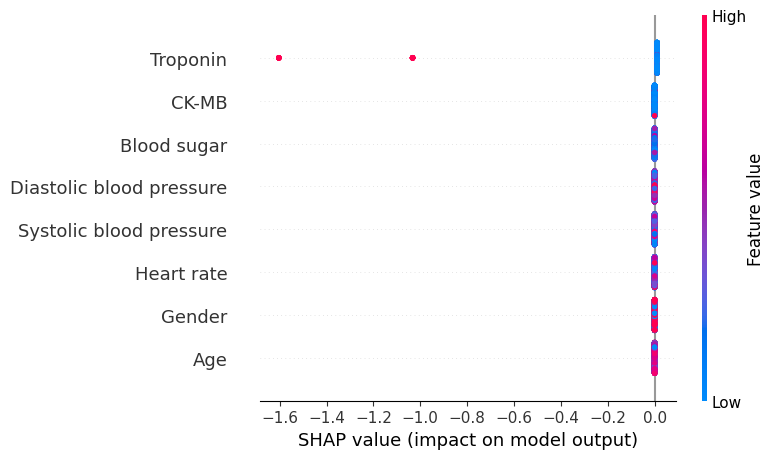

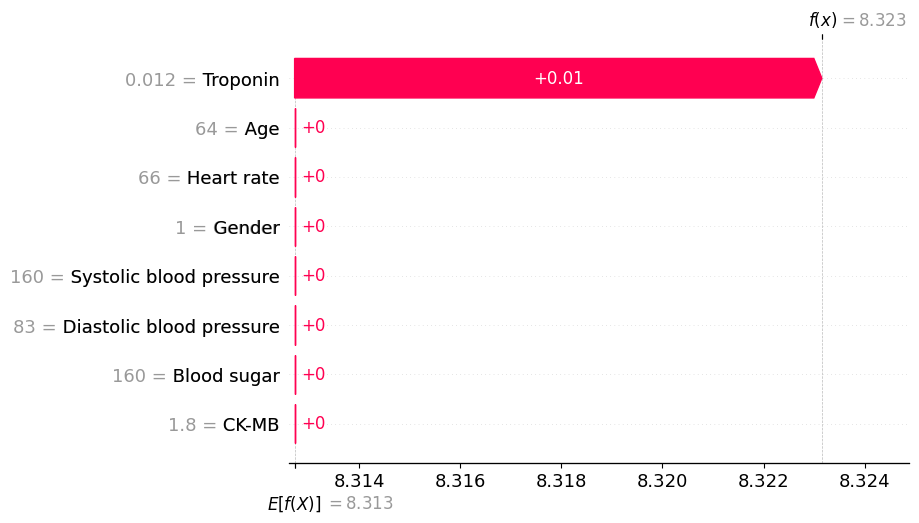

In [77]:
# ✅ 2. Explicação do Modelo com SHAP:

import shap
import matplotlib.pyplot as plt

# Criar o objeto SHAP explainer com o modelo e dados de treino
explainer = shap.Explainer(xgb_model, X)

# Calcular os valores SHAP para o conjunto de entrada
shap_values = explainer(X)

# Resumo global das importâncias
shap.summary_plot(shap_values, X)

# (Opcional) Exibir explicação de um paciente específico (ex: linha 0)
shap.plots.waterfall(shap_values[0])
